In [15]:
import torch
import argparse
from model import GPT
from utils import generate
from utils import getLoaderDataset
from utils import Args
from train import Training

args = Args()
print(args)
train = Training(args)
model, metrics = train.train_model()
print(train.tokenized_data.decode(
    generate(model, train.tokenized_data.encode("Oh God Oh God !"), 50)
))

Args(batch_size=10, n_tokens=64, n_layers=4, n_heads=4, d_model=128, use_lr_decay=True, lr=0.001, dataset_path='./datasets/shakespear_corpus.txt', max_iter=100, out_dir='./runs/', n_warm_iters=100, lr_decay_iter=5000, min_lr=0.0001, n_validation_batch=200, betas=(0.9, 0.99), n_epochs=10, val_int=100, save=True, save_int=200, name='milkshake', cross_val=False, k_fold=10)


AttributeError: 'Training' object has no attribute 'train_model'

In [16]:
N = 64
B = 12
loader, dataset = getLoaderDataset(N, B, "./datasets/shakespear_corpus.txt")

TypeError: getLoaderDataset() missing 2 required positional arguments: 'fold' and 'k_fold'

In [17]:
N = 64
B = 12
loader, token_dataset = getLoaderDataset(N, B, "./datasets/shakespear_corpus.txt")
print(len(token_dataset))

TypeError: getLoaderDataset() missing 2 required positional arguments: 'fold' and 'k_fold'

In [18]:
L = 12
d = 768
d_ff = 4 * d
h = 8
V = dataset.get_vocab_size()
print(V)
model = GPT(B, L, d, d_ff, N, h, V)

NameError: name 'dataset' is not defined

In [19]:
new_tokens = generate(model, dataset.encode("Hello World"), 100)
print(dataset.decode(new_tokens))

NameError: name 'model' is not defined

In [20]:
N = 64
B = 12
L = 6
d = 128
d_ff = 4 * d
h = 6
V = dataset.get_vocab_size()

NameError: name 'dataset' is not defined

In [21]:
B = 12
N = 64  # context of up to 256 previous characters
L = 4
h = 4
d = 128
learning_rate = 1e-3
use_lr_decay = False
dataset = './datasets/shakespear_corpus.txt'
out_dir = './runs/'

max_iterations = 1000

class Args(argparse.Namespace):
    batch_size:int = B
    n_tokens:int = N
    n_layers:int = L
    n_heads:int = h
    d_model:int = d
    use_lr_decay:bool = use_lr_decay
    learning_rate: float = learning_rate
    dataset: str = dataset
    max_iterations: int = max_iterations
    out: str = out_dir

In [ ]:
model, losses, perplexities = train_model(Args())

In [22]:
import torch

B = 12
N = 64  # context of up to 256 previous characters
L = 4
h = 4
d = 128
learning_rate = 1e-3
betas = (0.9, 0.99)
eps = 10e-9
n_warmup_iterations = 100
learning_rate_decay_iterations = 5000
min_learning_rate = 1e-4
use_lr_decay = True
loader, dataset = getLoaderDataset(N, B, "./datasets/shakespear_corpus.txt")

model = GPT(B, L, d, 3*d, N, h, V)

cpkt = torch.load("./runs/long_model_b128_t256_l16_h16_d256.pt", map_location=torch.device('cpu'))
model.load_state_dict(cpkt)
print(model)

TypeError: getLoaderDataset() missing 2 required positional arguments: 'fold' and 'k_fold'

In [ ]:
from utils import generate, CharDataSet

new_tokens = generate(model, dataset.encode("Hello World"), 300)
print(dataset.decode(new_tokens))

In [24]:
from utils import CharDataSet

In [26]:
B = 128
N = 256  # context of up to 256 previous characters
L = 16
h = 16
d = 256


data = CharDataSet(B, dataset_path='./datasets/shakespear_corpus.txt')

V = data.get_vocab_size()

print(V)
model = GPT(B, L, d, 3*d, N, h, V)

cpkt = torch.load("./runs/long_model_b128_t256_l16_h16_d256/long_model_b128_t256_l16_h16_d256_3_30000.pt", map_location=torch.device('cpu'))
model.load_state_dict(cpkt['model'])



./datasets/shakespear_corpus.txt
65


FileNotFoundError: [Errno 2] No such file or directory: './runs/long_model_b128_t256_l16_h16_d256/long_model_b128_t256_l16_h16_d256_3_30000.pt'

In [54]:
new_tokens = generate(model, data.encode("I understand thee well"), 100)


print(data.decode(new_tokens))

I understand thee well!
Thou desperate pilot, now at once run on
The dashing rocks thy sea-sick weary bark!
Here's to my l


In [58]:
print(cpkt['train_loss'].size())

torch.Size([30000])


dict_keys(['model', 'valid_loss', 'train_loss', 'params'])


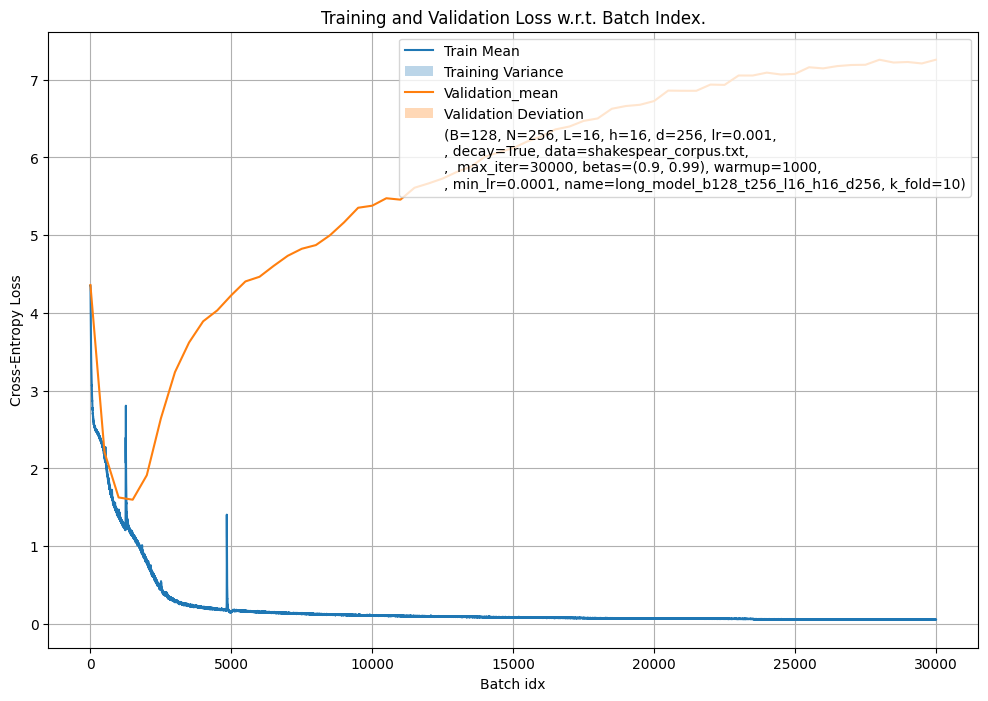

In [59]:
print(cpkt.keys())
from utils import cv_losses_graph

cv_losses_graph(
    cpkt ['train_loss'].unsqueeze(0), cpkt['valid_loss'].unsqueeze(0), 
    cpkt['params']['val_int'], './runs/long_model_b128_t256_l16_h16_d256/', # save graph to same folder
    True, "chill_model", cpkt['params']          
)

In [ ]:
import torch
from utils import cv_losses_graph, perplexity_graph

cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
print(cross_val_run.keys())
print(cross_val_run['k_fold_train_loss'].size())


perplexity_graph(
    cross_val_run ['k_fold_train_loss'], cross_val_run['k_fold_valid_loss'], 
    cross_val_run['params']['val_int'], path, # save graph to same folder
    True, "chill_model", cross_val_run['params']          
)


In [34]:
B = 128
N = 256  # context of up to 256 previous characters
L = 16
h = 16
d = 256


data = CharDataSet(B, dataset_path='./datasets/shakespear_corpus.txt')

V = data.get_vocab_size()

print(V)
model = GPT(B, L, d, 3*d, N, h, V)

cpkt = torch.load("./runs/long_model_b128_t256_l16_h16_d256/long_model_b128_t256_l16_h16_d256_0_5000.pt", map_location=torch.device('cpu'))
model.load_state_dict(cpkt['model'])



./datasets/shakespear_corpus.txt
65


<All keys matched successfully>

In [52]:
new_tokens = generate(model, data.encode("FRANCOIS:\nI am getting married.\n\nJULIEN:"), 500)


print(data.decode(new_tokens))

FRANCOIS:
I am getting married.

JULIEN:
O fair charged you news by his mother's womb:
And so I am in honour to depition
That I am now my scolding Lord or William Lord Hastings,
Untainled of good husband, for shall hap the court
In hurt be his great father. Good man.

VALERIA:
In the choler of things twenty land and safellow.

First Lord:
Be good-morrow, my lord, give to my kinsmer's pleasure
And bend an hold prochess and my armouth;
And whitherer belling and and and change amon,
Sand chond and and and and pat thand penearsss?
Tin But


In [1]:
from utils import CharDataSet
from model import GPT
import torch

B = 128
N = 256  # context of up to 256 previous characters
L = 16
h = 16
d = 256


data = CharDataSet(B, dataset_path='./datasets/shakespear_corpus.txt')

V = data.get_vocab_size()

model = GPT(B, L, d, 3*d, N, h, V)

cpkt = torch.load("./runs/long_model_b128_t256_l16_h16_d256_0_5000.pt", map_location=torch.device('cpu'))
model.load_state_dict(cpkt['model'])



<All keys matched successfully>

In [2]:
from N_gram import N_gram
import torch
from torch import Tensor
from utils import perplexity_graph

In [ ]:

k_fold = 10
baseline = N_gram(2, 128, './datasets/shakespear_corpus.txt')

perx_val = torch.zeros(size=(k_fold,))
perx_tra = torch.zeros(size=(k_fold,))

for k in range(k_fold):
    perx_train, perx_valid = baseline.train_model(k, k_fold) # ~5 seconds per call
    perx_val[k] = perx_valid
    perx_tra[k] = perx_train


In [9]:
# now plot std and mean on top of perx_graph etc.
perx_val_std, perx_val_mean = perx_val.std(-1).item(), perx_val.mean(-1).item()
print("Bigram Perplexity Mean :", perx_val_mean, "Perplexity std :", perx_val_std)

Bigram Perplexity Mean : 11.97327709197998 Perplexity std : 0.17396734654903412


In [ ]:
baseline3 = N_gram(3, 128, './datasets/shakespear_corpus.txt')

perx_val3 = torch.zeros(size=(k_fold,))
perx_tra3 = torch.zeros(size=(k_fold,))

for k in range(k_fold):
    perx_train3, perx_valid3 = baseline3.train_model(k, k_fold) 
    perx_val3[k] = perx_valid3
    perx_tra3[k] = perx_train3

# 1m20s

In [12]:
perx_val_std3, perx_val_mean3 = perx_val3.std(-1).item(), perx_val3.mean(-1).item()
print("Trigram Perplexity Mean :", perx_val_mean3, "Perplexity std :", perx_val_std3)

Trigram Perplexity Mean : 7.911648750305176 Perplexity std : 0.6726226806640625


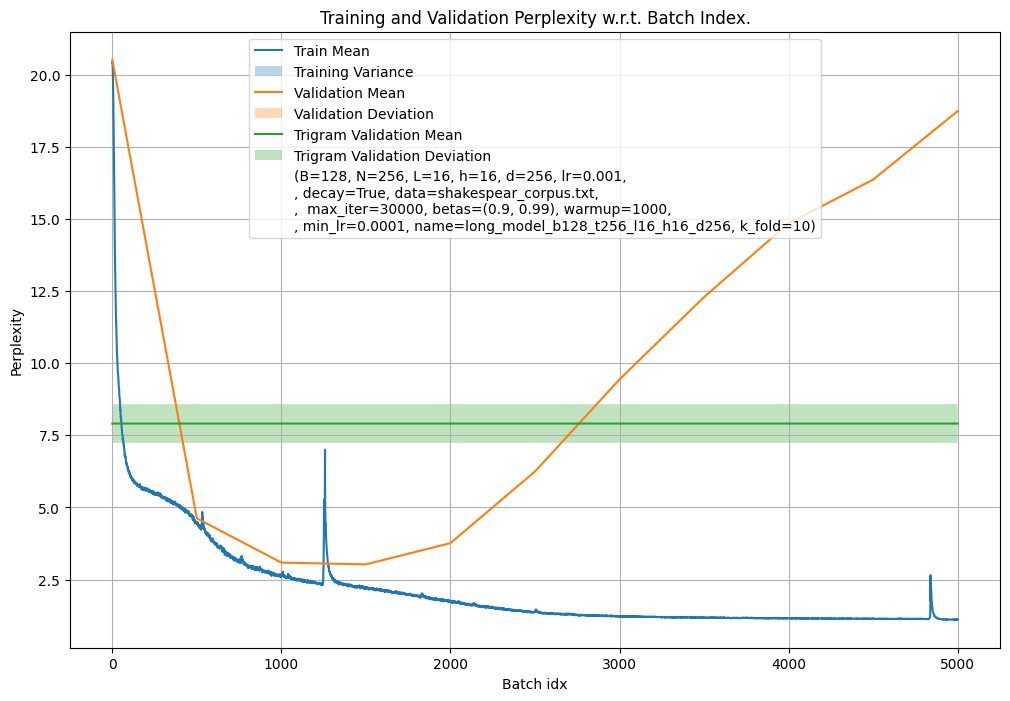

In [4]:
tri_perx_mean = 7.91
tri_perx_std = 0.67

perplexity_graph(
    cpkt['train_loss'].unsqueeze(0), cpkt['valid_loss'].unsqueeze(0), 
    cpkt['params']['val_int'], None, 
    False, "long_model", cpkt['params']      
)
